# Przepływ
Jeśli $F$ jest ciągłym polem wektorowym zdefiniowanym na zorientowanej powierzchni $S$ z jednostkowym wektorem normalnym n, to całka powierzchniowa wyraża się wzorem z wykładu:

\begin{equation}
\iint_{s} \vec{F} \, \cdot \, \vec{n} \, dA = \iint_{R} F(r(u,v)) \cdot N(u, v) \,du\,dv
\end{equation}

Ta całka jest również nazywana strumieniem F przez S.

$N$ - wektor normalny o wzorze: $N = r_u \times r_v$, oraz:<br>
\begin{equation}
r_u = \dfrac{\partial r}{\partial u}, \hspace{2cm}
r_v = \dfrac{\partial r}{\partial v}.
\end{equation}

Aby obliczyc przeplyw numerycznie potrzebujemy pochodnych cząstkowych $ r_u, r_v$, skorzystamy więc z definicji pochodnej: 

\begin{equation}
f'(x_0)= \lim_{h \to 0} \dfrac{f(x_0 +h) - f(x_0)}{h}
\end{equation}

Dobierając małe $h$ mamy możliwość przybliżenia pochodnej w danym punkcie, a co za tym idzie mieć dokładniejszy wynik.

In [4]:
from sympy import diff
from sympy.abc import s,a,n,q,e,w,x,u,y,z,v,r
from sympy import sin, cos, csc, sec, tan, cot, asin, acsc, acos, asec, atan, acot, atan2,log, sinh, cosh, tanh, coth,pi
import numpy as np
import sympy as sp
from sympy import *
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt


In [6]:
def flux(x,y,z, q,w,e, v1,v2,u1,u2, dx):
    
    """ (x,y,z) są to składowe pola wekotorwego F 
        (q,w,e) jest to  paramtryczna reprezentacja powierzchni r(u,v) 
        v1,v2 - przedział  dla v 
        u1,u2 - przedział dla u """
    
    F=[x,y,z]
    r=[q,w,e]
    
    x,u = symbols('x u') 
    y,v = symbols('y v')
     
    #tworzymy Fr
    Fr=[]
    for i in F:
        if i ==0:
            Fr.append(i)
        else:
            m=i
            mm=m.subs([(x,u),(y,v)])
            Fr.append(mm)
            
    u= sp.Symbol('u') 
    v= sp.Symbol('v')
    
    #obliczamy pochodne ru i rv z danym h
    h=dx
    ru=[]
    rv=[]

    for i in r:
        m=i
        m1=(m.subs(u,u+h) - m)/h
        m2=(m.subs(v,v+h) - m)/h
        ru.append(m1)
        rv.append(m2)
   
    #iloczyn wektorowy ru i rv
    N=np.cross(ru,rv) 
    
    # iloczyn skalarny F z N
    scalar=np.dot(Fr,N) 
    
    # całka oznaczona podwójna
    res = sp.integrate(scalar,(v,v1,v2), (u, u1,u2)) 

    return res


##### Podpunkt a
Dla warunków wejściowych:

$$\vec{F}=[2x,5y,0]$$

$$S:\vec{r}=[u,v,4u+3v] \quad 0\leq u\leq 1 \quad -8 \leq v \leq 8$$

Wynik algebraiczny to $-64$.

Wynik numeryczny dla $h=10^{-5}$ to $-64$.

In [4]:
#flux(2*x,5*y,0,u,v,4*u+3*v,-8,8,0,1,0.00001)

-64.0000000000000

Text(0.5, 1.0, 'Dokładność wyniku w zależności od h')

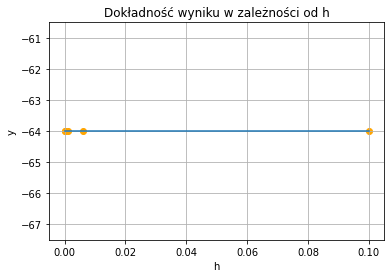

In [3]:
hh=[10**(-1),10**(-3),6*10**(-3),10**(-4),10**(-5)]
dd=[]
for i in hh:
    d=flux(2*u,5*v,0,u,v,4*u+3*v,-8,8,0,1,i)
    dd.append(d)
plt.scatter(hh,dd,color='orange')
x=np.linspace(0,0.1,100)
plt.plot(x,-64+0*x)
plt.xlabel("h")
plt.ylabel("y")
plt.grid()
plt.title("Dokładność wyniku w zależności od h")

##### Podpunkt c
Dla warunków wejściowych:

$$\vec{F}=[x-z,y-x,z-y]$$

$$S:\vec{r}=[ucosv,usinv,u], \quad 0\leq u\leq 3 ,\quad 0 \leq v \leq \pi$$

Wynik algebraiczny to $-18$.

Wynik numeryczny dla $h=10^{-5}$ to $-18.0000899995995 +2.24999748754452 \cdot 10^{-5}\pi$.

In [3]:
#flux((x*cos(y)-x),(x*sin(y)-x*cos(y)),(x-x*sin(y)),u*cos(v),u*sin(v),u,0,pi,0,3,0.00001)

-18.0000899995995 + 2.24999748752452e-5*pi

Text(0.5, 1.0, 'Dokładność wyniku w zależności od h')

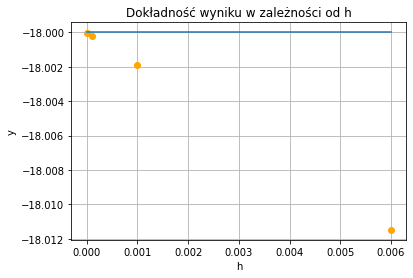

In [3]:
hh=[10**(-3),6*10**(-3),10**(-4),10**(-5)]
dd=[]
for i in hh:
    d=flux((x*cos(y)-x),(x*sin(y)-x*cos(y)),(x-x*sin(y)),u*cos(v),u*sin(v),u,0,pi,0,3,i)
    dd.append(d)
plt.scatter(hh,dd,color='orange')
x=np.linspace(0,0.006,100)
plt.plot(x,-18+0*x)
plt.xlabel("h")
plt.ylabel("y")
plt.grid()
plt.title("Dokładność wyniku w zależności od h")

##### Podpunkt e
Dla warunków wejściowych:
$$\vec{F}=[tg(xy),x^2y,-z]$$

$$S=y^2+\frac{1}{9}z^2=1 \quad 1\leq x\leq 4$$

$$\vec{r}(u,v)=[u,cosv,3sinv] \quad 1\leq u\leq 4 \quad 0 \leq v \leq 2\pi$$

Wynik algebraiczny to $-54\pi$.

Wynik numeryczny dla $h=10^{-5}$ to $-53.9999999991\pi$.

In [3]:
#flux(tan(x*cos(y)),x**2*cos(y),-3*sin(y),u, cos(v),3*sin(v),0,2*pi,1,4,0.00001)

-53.9999999991*pi

Text(0.5, 1.0, 'Dokładność wyniku w zależności od h')

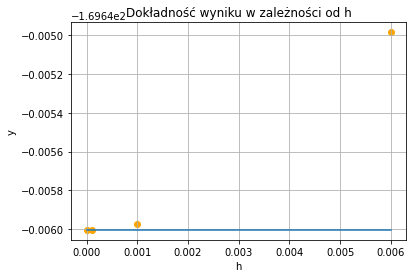

In [3]:
hh=[10**(-3),6*10**(-3),10**(-4),10**(-5)]
dd=[]
for i in hh:
    d=flux(tan(x*cos(y)),x**2*cos(y),-3*sin(y),u, cos(v),3*sin(v),0,2*pi,1,4,i)

    dd.append(d)
plt.scatter(hh,dd,color='orange')
x=np.linspace(0,0.006,100)
plt.plot(x,-54*pi+0*x)
plt.xlabel("h")
plt.ylabel("y")
plt.grid()
plt.title("Dokładność wyniku w zależności od h")

##### Podpunkt g
Dla warunków wejściowych:
$$\vec{F}=[y^2,x^2,z^4],$$

$$\vec{r}(u,v)=[ucosv,usinv,4u] \quad 0\leq u\leq 2 \quad 0 \leq v \leq \pi$$

Wynik algebraiczny to $\frac{-32+8192\pi}{3}$.

Wynik numeryczny dla $h=10^{-5}$ to $-10.6665599997861+2730.66666662115\pi$.

In [3]:
#flux(x**2*sin(y)**2,x**2*cos(y)**2,256*x**4,u*cos(v),u*sin(v),4*u,0,pi,0,2,0.00001)

-10.6665599997861 + 2730.66666662115*pi

Text(0.5, 1.0, 'Dokładność wyniku w zależności od h')

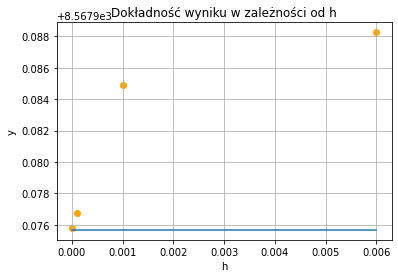

In [3]:
hh=[10**(-3),6*10**(-3),10**(-4),10**(-5)]
dd=[]
for i in hh:
    d=flux(x**2*sin(y)**2,x**2*cos(y)**2,256*x**4,u*cos(v),u*sin(v),4*u,0,pi,0,2,i)

    dd.append(d)
plt.scatter(hh,dd,color='orange')
x=np.linspace(0,0.006,10)
plt.plot(x,((-32/3)+(8192*np.pi/3))+0*x)
plt.xlabel("h")
plt.ylabel("y")
plt.grid()
plt.title("Dokładność wyniku w zależności od h")

##### Podsumowanie

Wynik zgodne do analitycznych są w przykładach gdzie mamy zdefinowaną płaszczyzną w innych przypadkach takich jak figury obrotowe wyniki numeryczne nie pokrywają się z analitycznym. Jest bliski ale jednak. Dobrane $h$ wpływa na dokładność wyniku. Czym mniejsze $h$ tym dokładniejszy wynik. W zaprezentowanych przez nas przykładach widzimy, że już $h=10^{-5}$ jest bliskie wynikowi analitycznemu.